/ext/sage/sage-8.3_1804/local/lib/python2.7/site-packages/ipykernel/__main__.py:38: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


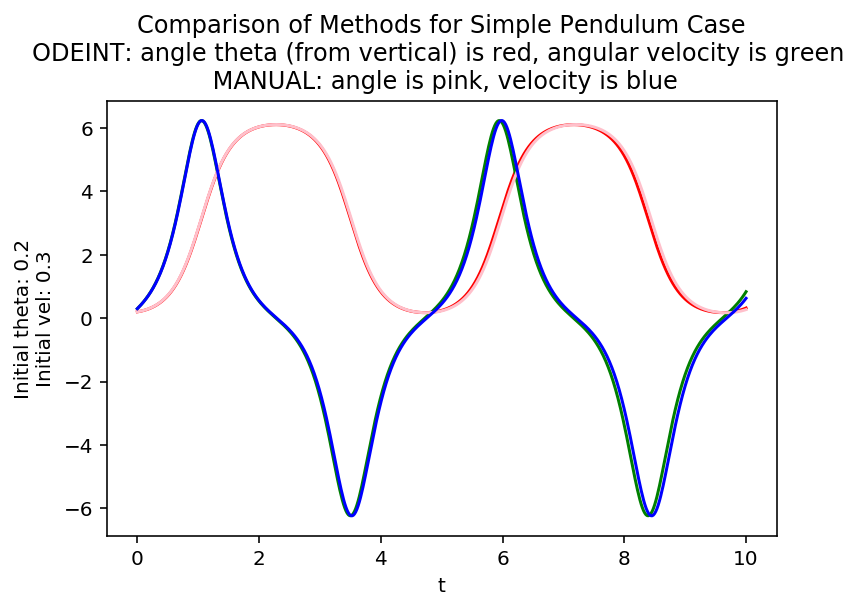

In [1]:
#math only for simplest pendulum case with fixed pivot
#running this will generate a graph using matplotlib

from scipy.integrate import odeint
from matplotlib import pylab as plt
import numpy as np

##############initial conditions###################
theta0 = .2 #initial angle in radians, theta=0 is straight up
thetadot0 = 0.3  #initial angular velocity of pend
atheta0 = 0.0 #initial angular accel
###################################################

#################Constants#########################
m = 1 #mass of pendulum (kg)
g = 9.8 #gravitational accel (m/s^2)
r = 1 #length of pendulum arm (m)
###################################################

theta = theta0 
thetadot = thetadot0
atheta = atheta0

def rhs(q, t):
    theta, thetadot = q
    
    if theta < 0:        ##keep theta between 0 and 2pi
        theta += 2*np.pi ##
    if theta > 2*np.pi:  ##
        theta -= 2*np.pi ##
    atheta = (g/r)*np.sin(theta)    #equation of motion for simple pendulum
        
    return [thetadot, atheta]

T=10.
steps= 500.   
q0 = ([theta0, thetadot0])
ts = np.linspace(0, T, steps)
#output_of_ode = odeint(rhs, q0, ts).T
q1,q2 = odeint(rhs, q0, ts).T
#display (output_of_ode)

plt.plot(ts, q1, color='r')
#print(len(ts))
plt.xlabel('t')
plt.ylabel('Initial theta: '+str(theta0)+'\nInitial vel: '+str(thetadot0))
plt.title('Comparison of Methods for Simple Pendulum Case\nODEINT: angle theta (from vertical) is red, angular velocity is green \n MANUAL: angle is pink, velocity is blue')
plt.plot(ts, q2, color='g')
#duration = 30.0
dt=.02
#i=0
count = 0
Q1 = np.arange(0,500, dtype = float)
#print(len(Q1))
Q2=np.arange(0,500,dtype=float)
Q1[0]=theta0#+.2
#print(theta0)
#print(Q1[0])
Q2[0]=thetadot0#+.2
theta = theta0
while count < 500:
    count+=1   
    #if theta <0:         ##keep theta between 0 and 2pi  for purpose of case handling in accelerate_slider()
        #theta += 2*np.pi ##
    #if theta > 2*np.pi:  ##
        #theta -= 2*np.pi ##
    atheta = (g/r)*np.sin(theta)
    thetadot += atheta*dt
    theta += thetadot*dt
    if count < 500:
        Q1[count]= theta#+.2
        
        Q2[count]=thetadot#+.2
    
plt.plot(ts, Q1, color='pink')

plt.plot(ts, Q2, color='blue')


In [2]:
###  numpy's sin (and other functions) can accept multiple shapes of input...
single_val = np.sin(np.pi/2);
row_vec = np.sin([np.pi/2, np.pi/4, np.pi/6]);
col_vec = np.sin([[np.pi/2],[np.pi/4],[np.pi/6]]);
display(single_val)
display(row_vec)
display(col_vec)

1.0

array([ 1.        ,  0.70710678,  0.5       ])

array([[ 1.        ],
       [ 0.70710678],
       [ 0.5       ]])

In [ ]:
#visualization of the simple pendulum with fixed pivot
#running this will open a canvas below and run a pendulum simulation

import vpython as vp
from vpython import vec, color
import time
import numpy as np
from math import sin, cos
#from decimal import Decimal

#GlowScript bits
scene = vp.canvas()
scene.width =1000
scene.height = 650
scene.range = 1.8
scene.title = "Moveable Pendulum"
#scene.visible = True
t0=time.time()
duration = 60.0 #seconds to run simulation

##############  initial conditions  ##############
theta0 = .05 #initial angle         theta=0 is straight up, theta increases clockwise
thetadot0 = 0. #initial angular velocity of pend
atheta0 = 0. #initial angular accel0
p0 = 0. #initial position of slider
pdot0 = 0. #initial velocity of slider
ap0 = 0. #initial accel of slider
dtheta0 = 0.  #an incremental change of angle
###################################################

#################  Constants  #####################
m=1 #mass of pendulum
alpha=5 #ratio of pivot mass to pendulum mass
g=9.8 #gravitational accel
r=1 #length of pendulum arm
###################################################

################  Limitations  ####################
p_min = -1.7   #leftmost slider position      ####are these values compatible between graphics, ODE's??????
p_max = 1.7    #rightmost slider position
ap_max=3. #maximum acceleration of slider         #####i picked this value at random
pdot_max = 5.  #picked at random
###################################################


p = p0 #p is x-coordinate of the slider/pivot
pdot = pdot0
ap=ap0
theta = theta0 #theta is measured from 0 radians when pend is straight up and is positive to the left
thetadot = thetadot0
atheta= atheta0
dtheta = dtheta0
ap_adjust = 0



#####################the build assembly##############################
rod = vp.cylinder( pos=vec(-2.7,-.2,0), axis=vec(5.4,0,0), color = color.green, radius=0.02 )
rodlimitmarkleft = vp.cylinder( pos=vec(-1.7,-.2,0), axis=vec(.1,0,0), color = color.yellow, radius=0.02 )
rodlimitmarkright = vp.cylinder( pos=vec(1.7,-.2,0), axis=vec(.1,0,0), color = color.yellow, radius=0.02 )
supportleft = vp.box( pos=vec(-2.7,-1.3,0), color = color.red, size=vec(.1,2.2,.1) )
supportright = vp.box( pos=vec(2.7,-1.3,0), color = color.red, size=vec(.1,2.2,.1) )
slider = vp.box(pos=vec(p,rod.pos.y,0),color = color.red, size=vec(.1,.1,.1))
axlepin = vp.cylinder( pos=vec(slider.pos.x,slider.pos.y,slider.pos.z+0.1), axis=vec(0,0,.2), color = color.yellow, radius=0.02 )
pendulumarm = vp.cylinder(pos=vec(axlepin.pos.x,axlepin.pos.y,axlepin.pos.z+0.2), axis=vec(float(r)*cos(np.pi/2-float(theta)),float(r)*sin(np.pi/2-float(theta)),0), color = color.green, radius=0.02 )
pendulummass = vp.sphere(radius=.1,pos=vec(axlepin.pos.x+float(r)*cos(np.pi/2-float(theta)),axlepin.pos.y+float(r)*sin(np.pi/2-float(theta)),.3))
#pend = vp.compound([pendulumarm,pendulummass])       #????????
pivot = vec(axlepin.pos.x,axlepin.pos.y,axlepin.pos.z+.2)
######################################################################

#EQUATIONS OF MOTION
atheta = (g/r)*sin(theta)

dt = .05
count = 0
time.sleep(3)
while time.time() < (t0 + duration):
    vp.rate(10)
    theta = theta%(2*np.pi)
    atheta = (g/r)*np.sin(theta)
    thetadot +=  atheta*dt
    theta += thetadot*dt
    dtheta = -thetadot*dt
    pendulumarm.rotate(angle = dtheta, axis=vec(0,0,1), origin=pivot)
    pendulummass.pos.x = axlepin.pos.x+float(r)*cos(np.pi/2-float(theta))
    pendulummass.pos.y = axlepin.pos.y+float(r)*sin(np.pi/2-float(theta))

<IPython.core.display.Javascript object>

ERROR! Session/line number was not unique in database. History logging moved to new session 5


In [ ]:
#a simpler example using Visual Python
#running this will open a canvas below and display shapes according to which lines are uncommented in the script

import vpython as vp
from vpython import vec, color
#import time
import numpy as np
#from math import sin, cos

#GlowScript bits
myscene = vp.canvas()
myscene.width =1000
myscene.height = 650
myscene.range = 2
myscene.title = "A PICTURE FOR PYTHON WORKING GROUP"
#myscene.visible = True
#vp.rate(10)


#mybox = vp.box()
#mybox = vp.box(pos = vec(1,1,0))
#mybox = vp.box(pos = vec(1,1,0), color = color.purple)
mybox1 = vp.box(pos = vec(1,1,0), color = color.purple, size = vec(.2,.4,.6)) 
mybox2 = vp.box(pos = vec(-1,1,0), color = color.green, size = vec(.5,.4,1.2)) 
mybox2.rotate(axis = vec(1,0,0),angle = np.pi/2)#, origin = vec(0,0,0))
#mysphere = vp.sphere()
#mysphere = vp.sphere(pos = vec(-1,-1,2))
mysphere = vp.sphere(radius = .3, pos = vec(0,-1,0), color = color.red)
mysphere.velocity = vec(0,1,0)

times = 0
while times < 200:
    vp.rate(5)
    mybox2.rotate(axis = vec(1,0,0),angle = np.pi/6)
    mybox1.rotate(axis = vec(0,1,0),angle = np.pi/6)
    mysphere.pos = mysphere.pos + mysphere.velocity*.03
    times += 1
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>